In [7]:
print("hello")

hello


In [8]:
import cv2
import os

def extract_frames_from_videos(dataset_path='Dataset', output_path='Frames', frame_rate=1):
    os.makedirs(output_path, exist_ok=True)

    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)
        output_class_path = os.path.join(output_path, class_folder)
        os.makedirs(output_class_path, exist_ok=True)

        for idx, video_file in enumerate(os.listdir(class_path)):
            video_path = os.path.join(class_path, video_file)
            cap = cv2.VideoCapture(video_path)
            frame_count = 0
            saved_count = 0

            while True:
                ret, frame = cap.read()
                if not ret:
                    break

                if frame_count % frame_rate == 0:
                    frame_name = f"{class_folder}_{idx}_{saved_count}.jpg"
                    cv2.imwrite(os.path.join(output_class_path, frame_name), frame)
                    saved_count += 1

                frame_count += 1

            cap.release()
            print("✅ Frame extraction complete.")

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_data_generators(frame_dir='Frames', img_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

    train_generator = datagen.flow_from_directory(
        frame_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    val_generator = datagen.flow_from_directory(
        frame_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, val_generator


In [12]:
extract_frames_from_videos(dataset_path='Dataset', output_path='Frames', frame_rate=30)  # adjust frame_rate as needed

✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extraction complete.
✅ Frame extrac

In [13]:
train_gen, val_gen = create_data_generators()

Found 969 images belonging to 7 classes.
Found 238 images belonging to 7 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(input_shape=(224, 224, 3), num_classes=7):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [15]:

model = build_model(num_classes=train_gen.num_classes)


C:\Users\yashs\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.9998 - loss: 0.0207 - val_accuracy: 0.4412 - val_loss: 2.6068
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.9975 - loss: 0.0171 - val_accuracy: 0.4202 - val_loss: 2.7047
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 0.4370 - val_loss: 2.8680
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.9983 - loss: 0.0115 - val_accuracy: 0.4160 - val_loss: 2.9122
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.9952 - loss: 0.0204 - val_accuracy: 0.3950 - val_loss: 3.2547
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.4160 - val_loss: 3.1434
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.4202 - val_loss: 3.1276
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.4370 - val_los

In [21]:
model.save("yoga_video_classifier.h5")


In [22]:
import matplotlib.pyplot as plt

def plot_training_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig("training_curves.png")
    plt.show()


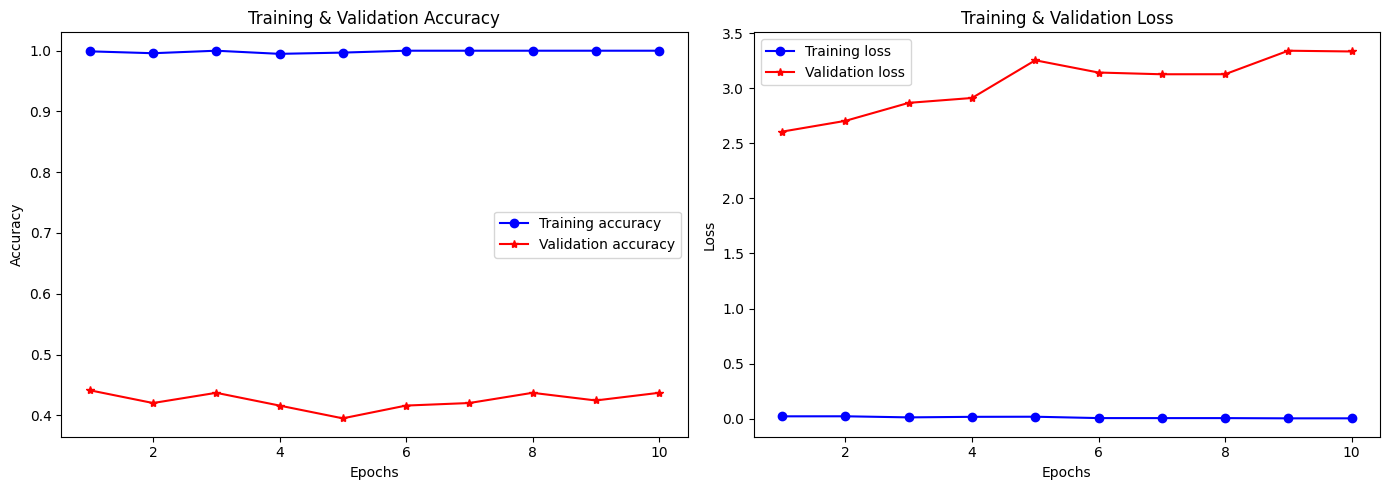

In [23]:
plot_training_curves(history)


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

def evaluate_model(model, val_gen):
    val_gen.reset()
    y_pred = model.predict(val_gen, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = val_gen.classes
    class_labels = list(val_gen.class_indices.keys())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=class_labels))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.savefig("confusion_matrix.png")
    plt.show()



Classification Report:
                   precision    recall  f1-score   support

        Balassana       0.17      0.19      0.18        36
       Bhungassan       0.21      0.17      0.19        35
 LeftTrikonasanas       0.17      0.18      0.17        28
         Padmasan       0.00      0.00      0.00        16
      Parvatassan       0.17      0.21      0.19        33
RightTrikonasanas       0.30      0.30      0.30        53
          Savasan       0.17      0.19      0.18        37

         accuracy                           0.20       238
        macro avg       0.17      0.18      0.17       238
     weighted avg       0.20      0.20      0.20       238


Confusion Matrix:


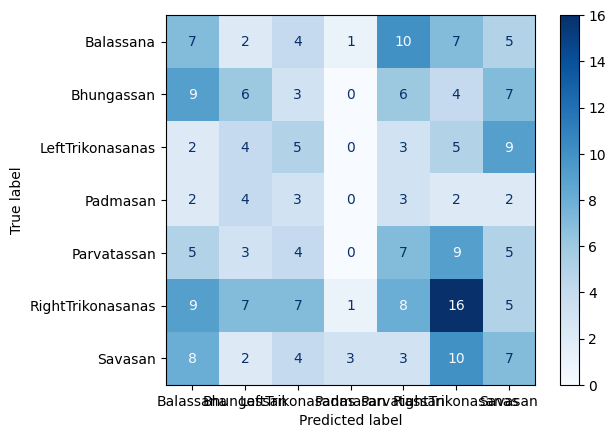

In [25]:
evaluate_model(model, val_gen)
